# Analysis of Covid-19 NYC data
We graph the latest data, the history of the reports, and the changes over time.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import utilities as u

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['figure.autolayout'] = True

def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
dat = pd.read_csv("../trends/data-by-day.csv")
dat.rename(columns={"CASE_COUNT": "NEW_COVID_CASE_COUNT",
                   "date_of_interest" :"DATE_OF_INTEREST"},
           inplace=True)
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat.head()

,NEW_COVID_CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
DATE_OF_INTEREST,,,,,,,,,,,,,,,,,,,,,
2020-02-29,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-03,1,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-04,5,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Latest report
We generate a bar chart of the new cases/day.  Since there's weekly cyclicity, we also graph the 7 day rolling average.  The latter allows one to better see trends.  But the analysis is hampered by reporting delays - many sites don't promptly report the data.

In [5]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()
dat["Hospitalized/day, 7 day avg"] = dat["HOSPITALIZED_COUNT"].rolling(window="7D").mean()
dat["Deaths/day, 7 day avg"] = dat["DEATH_COUNT"].rolling(window="7D").mean()

## Full history
Note that the 7 day rolling average clearly shows the trends

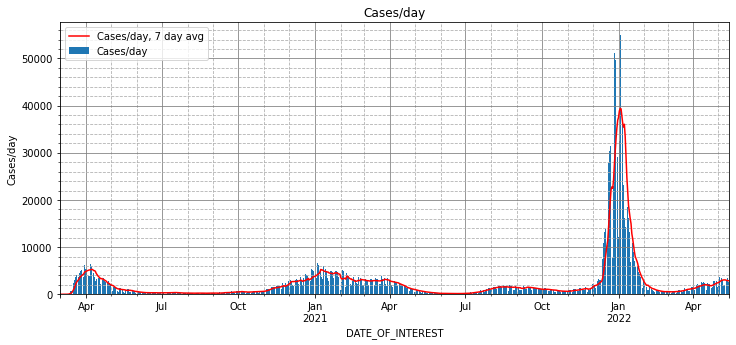

In [6]:
fig, ax = pltdflt(figsize=(12,5))
mticker.Locator.MAXTICKS = 10000

df = dat

df[["Cases/day, 7 day avg"]].plot(style="-", ax=ax, color="red")
plt.bar(df.index, df["NEW_COVID_CASE_COUNT"])


plt.ylabel("Cases/day")
plt.title("Cases/day")
ax.legend(["Cases/day, 7 day avg", "Cases/day"])

## Last 3 months
(To tie out against https://www1.nyc.gov/site/doh/covid/covid-19-data.page).

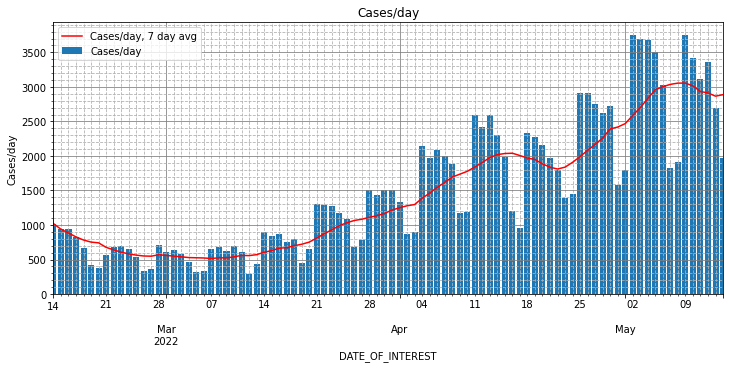

In [7]:
fig, ax = pltdflt(figsize=(12,5))
mticker.Locator.MAXTICKS = 10000

lastdt = dat.index[-1]
firstdt = dat.index[0]

start = lastdt - pd.DateOffset(months=3)
#start = firstdt

df = dat[dat.index >= start]

df[["Cases/day, 7 day avg"]].plot(style="-", ax=ax, color="red")
plt.bar(df.index, df["NEW_COVID_CASE_COUNT"])


plt.ylabel("Cases/day")
plt.title("Cases/day")
ax.legend(["Cases/day, 7 day avg", "Cases/day"])

## 7 day rolling average, full history
Just the rolling average itself, for better visibility

Text(0.5, 1.0, 'Cases/day, 7 day average')

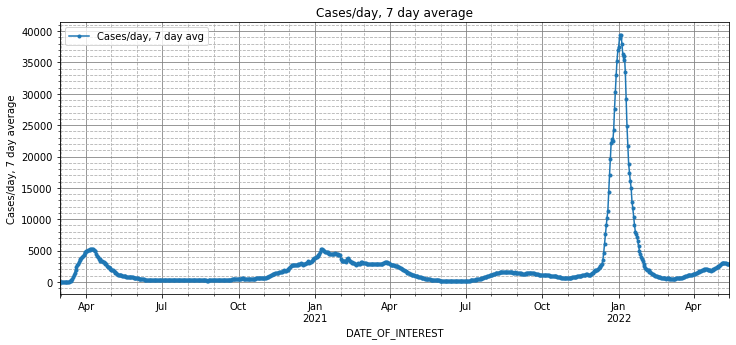

In [8]:
fig, ax = pltdflt(figsize=(12,5))

dat[["Cases/day, 7 day avg"]].plot(style=".-", ax=ax)
plt.ylabel("Cases/day, 7 day average")
plt.title("Cases/day, 7 day average")

## Zooming into the first wave...

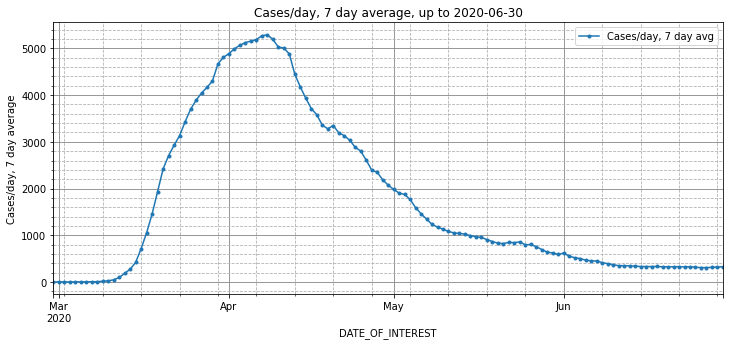

In [9]:
fig, ax = pltdflt(figsize=(12,5))
end = "2020-06-30"
dat[dat.index <= end][["Cases/day, 7 day avg"]].plot(style=".-", ax=ax)

plt.ylabel("Cases/day, 7 day average")
plt.title(f"Cases/day, 7 day average, up to {end}")
plt.savefig("historyThroughJune.png", bbox_inches="tight")

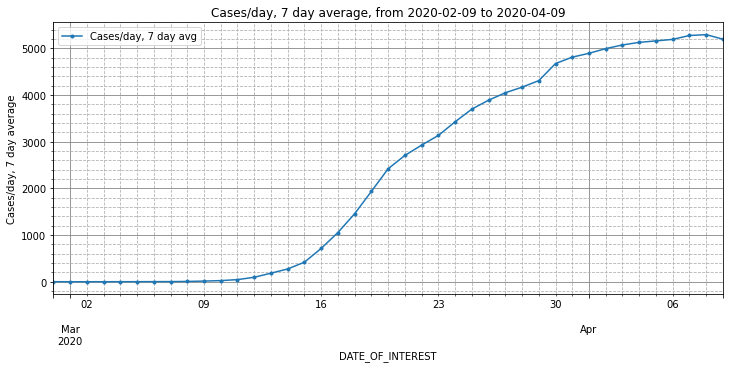

In [10]:
fig, ax = pltdflt(figsize=(12,5))
start = "2020-02-09"
end = "2020-04-09"
dat[dat.index <= end][["Cases/day, 7 day avg"]].plot(style=".-", ax=ax)

plt.ylabel("Cases/day, 7 day average")
plt.title(f"Cases/day, 7 day average, from {start} to {end}")
plt.savefig("historyTwoMonthsToPeak.png", bbox_inches="tight")

## Recent history
Analyzing the post-peak history from June 1st through the present (9/23), we see that the overall trend is a drop in the number of cases per day, but we've also seen some peaks.  It was flat from the end of June through the beginning of July at around 325 new cases/day.  There was a small peak mid-July of 375 new cases/day, after which the cases per day continued to drop to drop and then stablised at around 250 cases/day.  The number of cases per day started rising again in the second week of September, coinciding with school openings.  This rose further as addtional reports were collected.

At the beginning of October, I wrote that I wouldn't be surprised to see the September peak to rise up to the June-July overall level, or even exceed the July peak.

Sure enough, it has.

<AxesSubplot:xlabel='DATE_OF_INTEREST', ylabel='Cases/day, 7 day avg'>

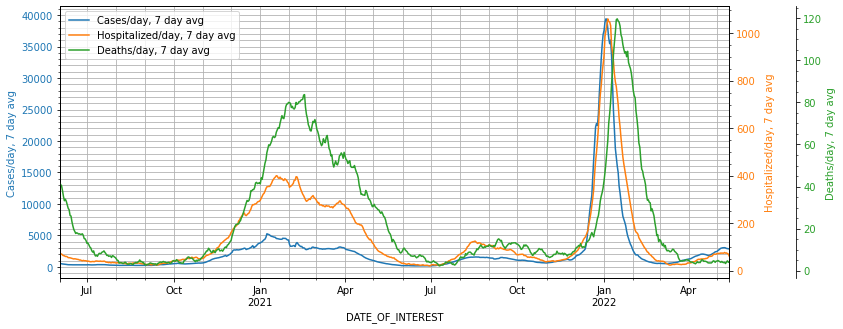

In [11]:
start = "2020-06-01"
period = dat[dat.index > start]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

Since August

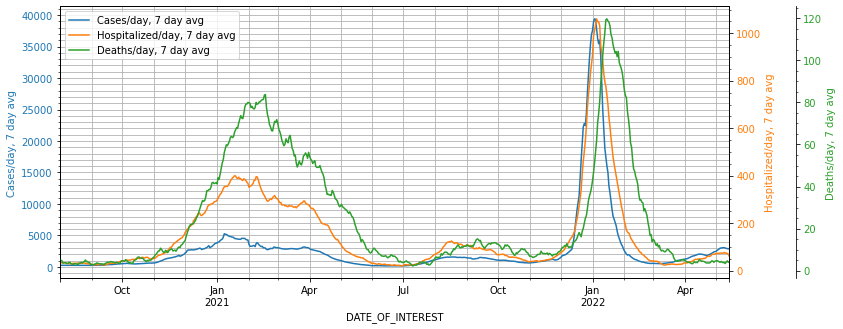

In [12]:
start = "2020-08-01"
end = "2025-12-01"

period = dat[(dat.index >= start) & (dat.index <= end)]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

plt.savefig("twoMonthsToOctPeak.png", bbox_inches="tight")

For comparison, 1st peak

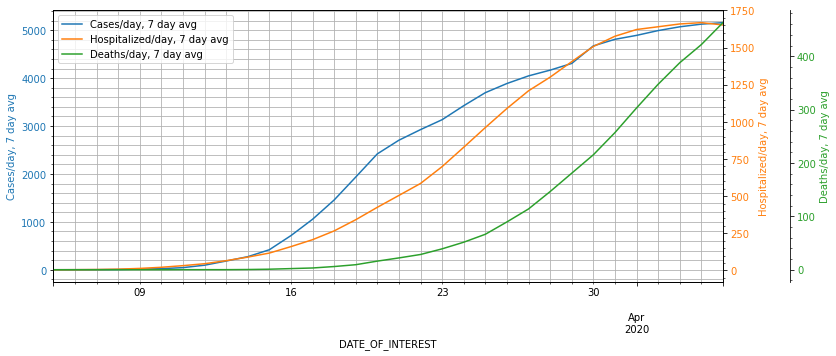

In [13]:
start = "2020-03-05"
end = "2020-04-05"

period = dat[(dat.index >= start) & (dat.index <= end)]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))
plt.grid(False, which="minor")


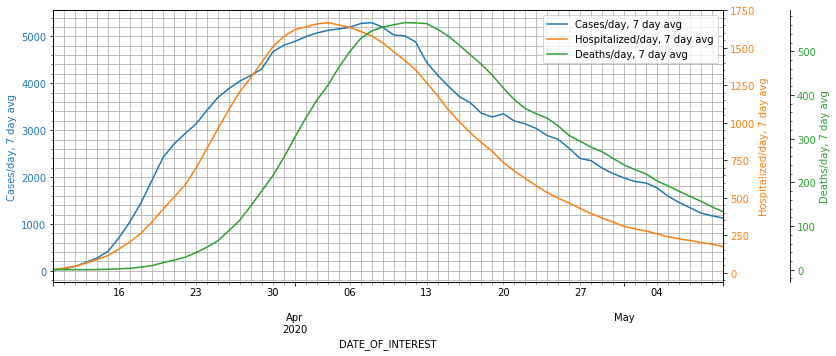

In [14]:
start = "2020-03-10"
end = "2020-05-10"

period = dat[(dat.index >= start) & (dat.index <= end)]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))
plt.grid(False, which="minor")

## Continued growth
**10/12**: Unfortunately, I was correct.  The cases per day has continued to rise.  The latest peak, which occurred at the beginning of October, is almost double the July peak.  And that's only 6 days ago, so it's likely that the counts for that date will continue to rise as additional data comes in over the next week.

Let's compare the recent growth to the start of the pandemic, by looking at the last month of data (up to the recent peak) compared to a month from the beginning of the pandemic.

<function matplotlib.pyplot.show(close=None, block=None)>

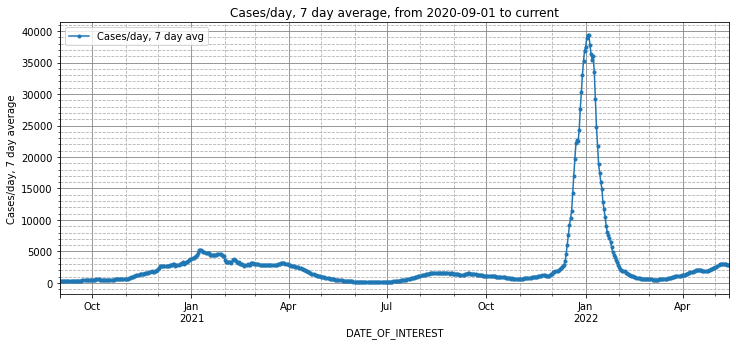

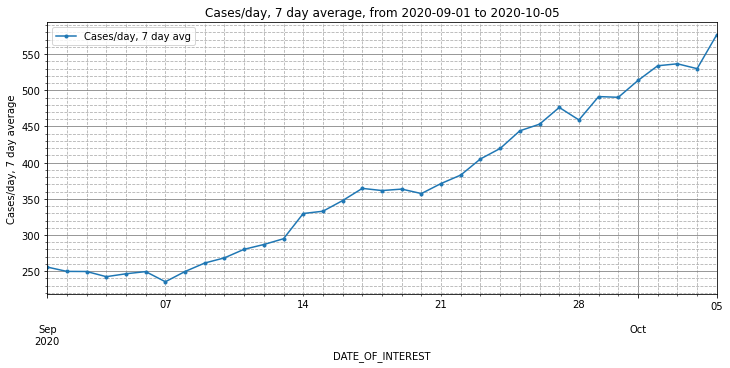

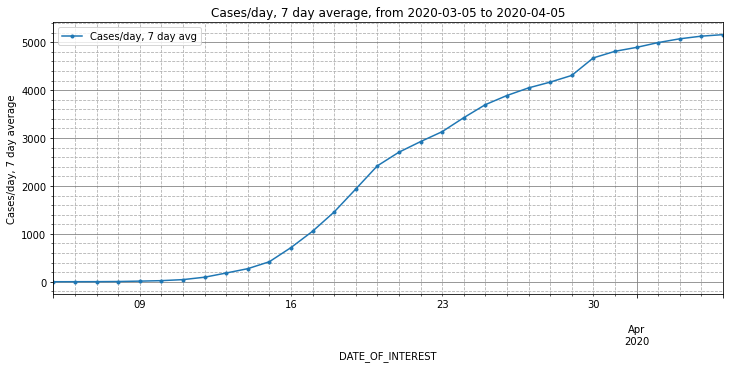

In [15]:
fig, ax = pltdflt(figsize=(12,5))
start = "2020-09-01"
dat[(dat.index >= start)][["Cases/day, 7 day avg"]].plot(style=".-", ax=ax)
plt.ylabel("Cases/day, 7 day average")
plt.title(f"Cases/day, 7 day average, from {start} to current")
plt.show

fig, ax = pltdflt(figsize=(12,5))
start = "2020-09-01"
end = "2020-10-05"
dat[(dat.index >= start) & (dat.index <= end)][["Cases/day, 7 day avg"]].plot(style=".-", ax=ax)
plt.ylabel("Cases/day, 7 day average")
plt.title(f"Cases/day, 7 day average, from {start} to {end}")
plt.show

fig, ax = pltdflt(figsize=(12,5))
start = "2020-03-05"
end = "2020-04-05"
dat[(dat.index >= start) & (dat.index <= end)][["Cases/day, 7 day avg"]].plot(style=".-", ax=ax)
plt.ylabel("Cases/day, 7 day average")
plt.title(f"Cases/day, 7 day average, from {start} to {end}")
plt.show


We see that the recent ramp-up, while worrisome, is nothing compared to the beginning of the pandemic.  The beginning of the pandemic saw a doubling of cases every 1-3 days until steps were taken to slow the process.  In the recent data, it's taken almost a month to double the number of daily cases.

# Historical analysis
We graph all of the historical reports to analyze the missing data.  We look at:
 - Cases/day and deaths/day
 - 7 day rolling average of above
 - 7 day rolling average of cases/day also in log scale
 
We see that it can take as long as 2 weeks (and sometimes longer) to get all of the data for a given date.

In [16]:
hdat = pd.read_csv("../history.csv")
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])

In [17]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-13,2020-03-26 11:26:41,603.000000,1.0,1.000000,123.0,123.000000,603.0
1,2020-03-14,2020-03-26 11:26:41,602.000000,2.0,1.500000,160.0,141.500000,601.0
2,2020-03-15,2020-03-26 11:26:41,726.333333,5.0,2.666667,193.0,158.666667,975.0
3,2020-03-16,2020-03-26 11:26:41,1023.000000,9.0,4.250000,290.0,191.500000,1913.0
4,2020-03-17,2020-03-26 11:26:41,1251.000000,7.0,4.800000,315.0,216.200000,2163.0


In [18]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="NEW_COVID_CASE_COUNT")

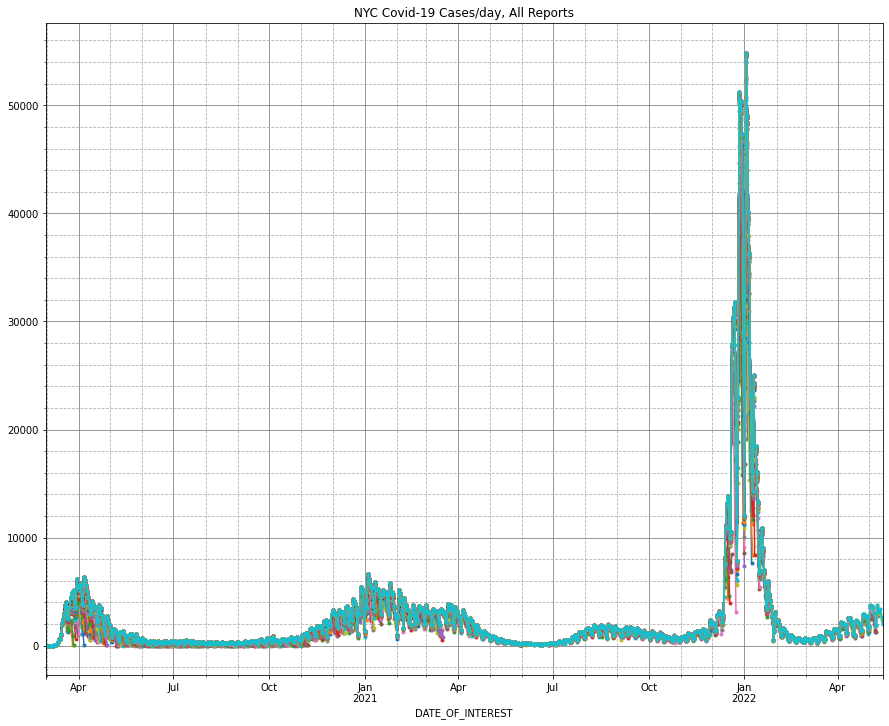

In [19]:
fig, ax = pltdflt((15,12))
dp.plot(style=".-", ax=ax, legend=None)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()

#ax.legend(loc="upper left")
plt.title("NYC Covid-19 Cases/day, All Reports")
plt.savefig("casesPerDayHistoryRaw.png", bbox_inches="tight")

In [20]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Cases/day, 7 day avg")

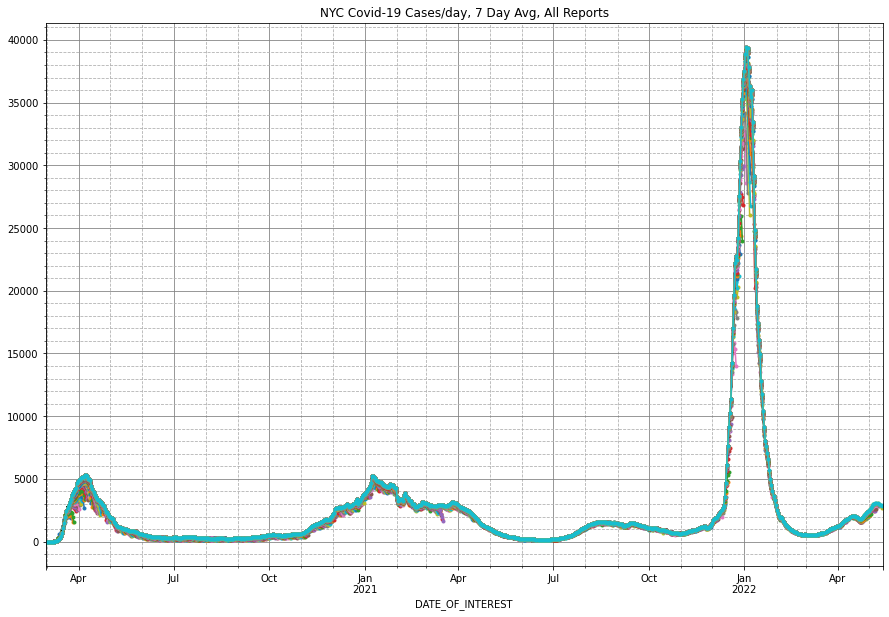

In [21]:
fig, ax = pltdflt((15,10))
dp.plot(style=".-", ax=ax, legend=None)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()
#ax.legend(loc="upper left")
plt.title("NYC Covid-19 Cases/day, 7 Day Avg, All Reports")
plt.savefig("casesPerDayHistory.png", bbox_inches="tight")

Text(0.5, 1.0, 'NYC Covid-19 Cases/day, 7 Day Avg, All Reports, Log View')

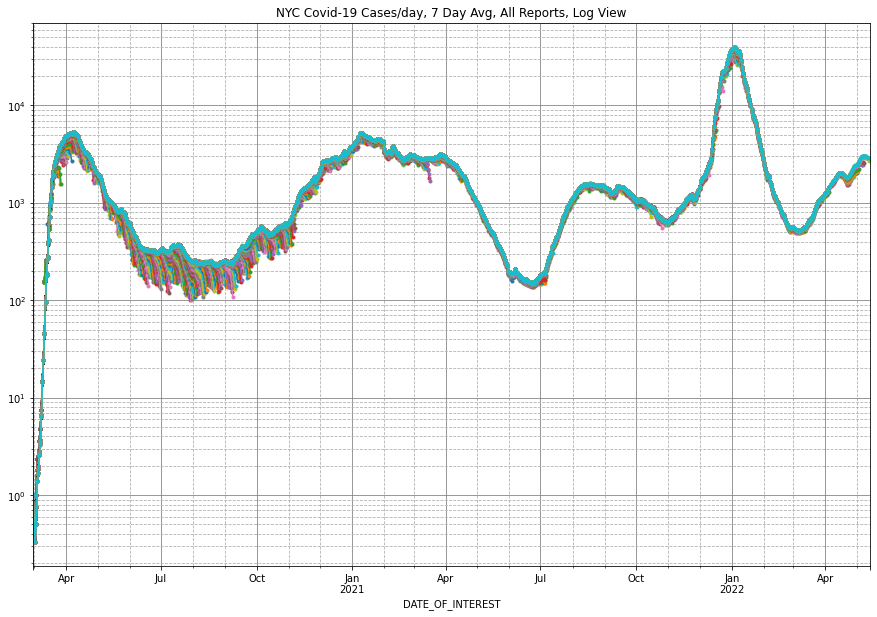

In [22]:
fig, ax = pltdflt((15,10))
ax.set_yscale("log")
dp.plot(style=".-", ax=ax, legend=None)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()
#ax.legend(loc="upper left")
plt.title("NYC Covid-19 Cases/day, 7 Day Avg, All Reports, Log View")

In [23]:
start = "2020-09-01"
hdatpart = hdat[hdat["AS_OF"] >= start]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Cases/day, 7 day avg")
dppart = dp[dp.index >= start]

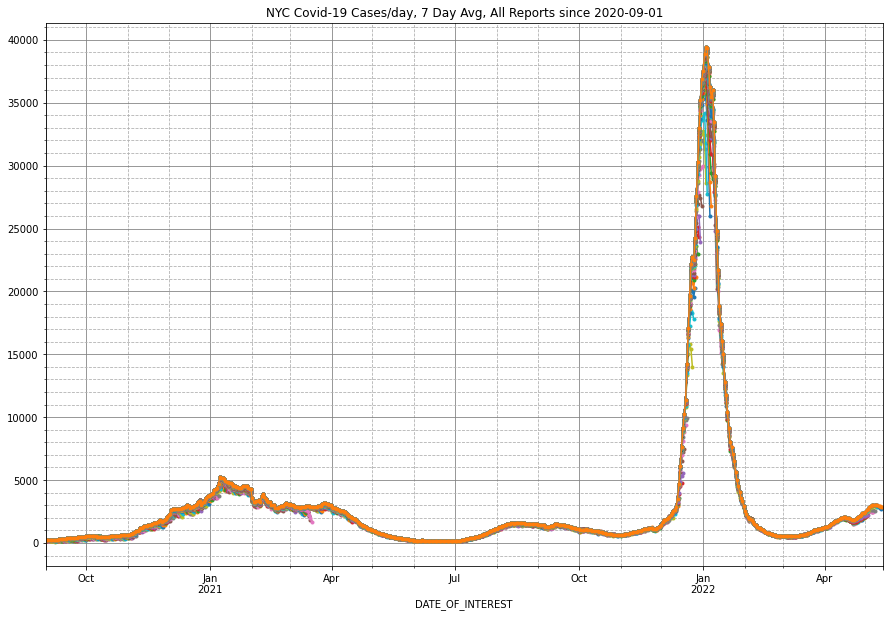

In [24]:
fig, ax = pltdflt((15,10))
dppart.plot(style=".-", ax=ax, legend=None)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()
#ax.legend(loc="upper left")
plt.title(f"NYC Covid-19 Cases/day, 7 Day Avg, All Reports since {start}")
plt.savefig("casesPerDayHistoryNov2.png", bbox_inches="tight")

In [25]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="DEATH_COUNT")

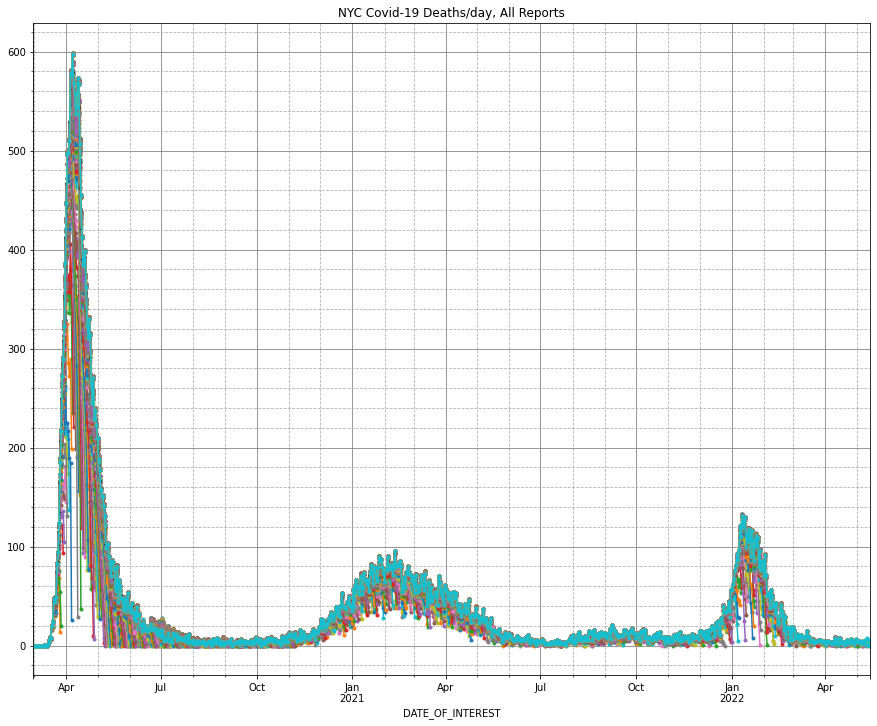

In [26]:
fig, ax = pltdflt((15,12))
dp.plot(style=".-", ax=ax, legend=None)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()

#ax.legend(loc="upper left")
plt.title("NYC Covid-19 Deaths/day, All Reports")
plt.savefig("deathsPerDayHistoryRaw.png", bbox_inches="tight")

In [27]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Deaths/day, 7 day avg")

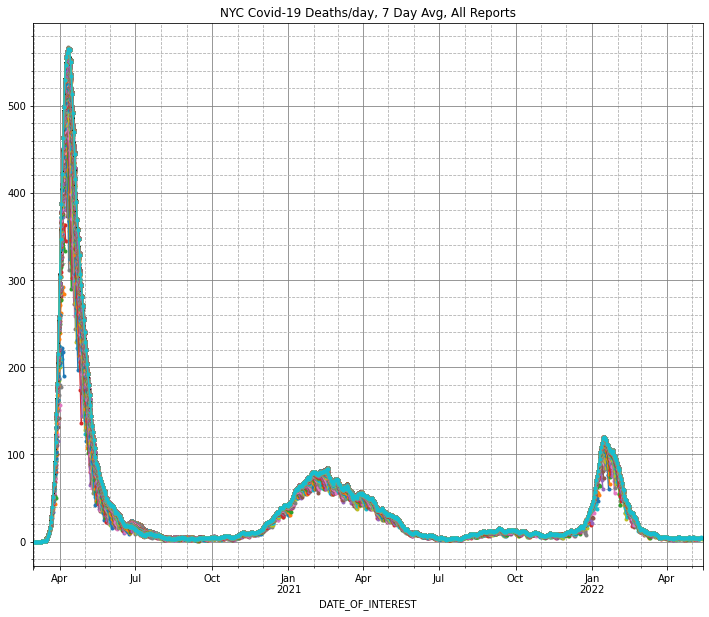

In [28]:
fig, ax = pltdflt()
dp.plot(style=".-", ax=ax, legend=None)
#ax.legend(loc="upper left")
plt.title("NYC Covid-19 Deaths/day, 7 Day Avg, All Reports")
plt.savefig("deathsPerDayHistory.png", bbox_inches="tight")

In [29]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="HOSPITALIZED_CASE_COUNT")

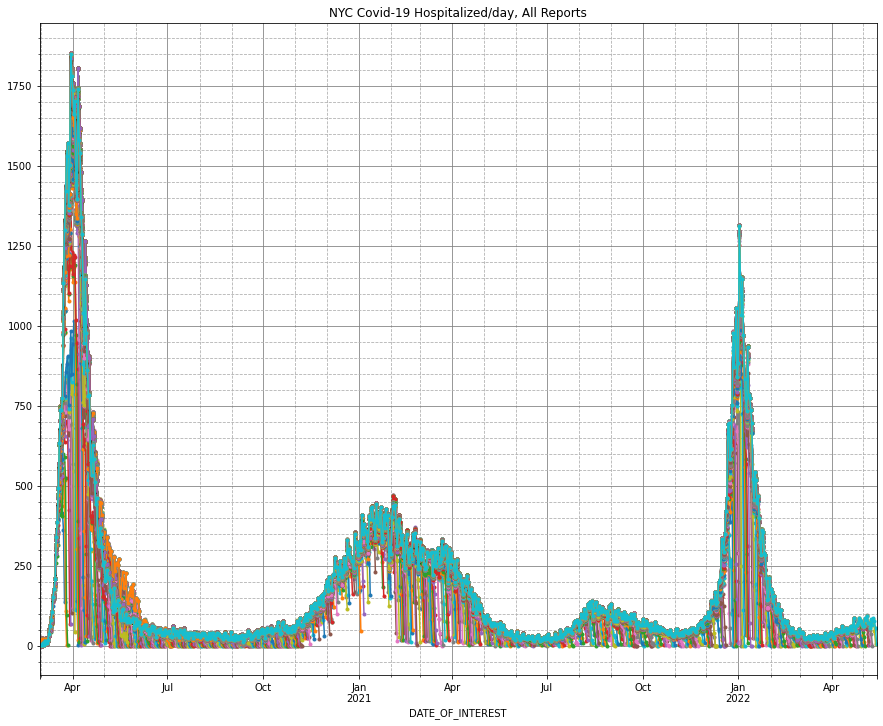

In [30]:
fig, ax = pltdflt((15,12))
dp.plot(style=".-", ax=ax, legend=None)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()

#ax.legend(loc="upper left")
plt.title("NYC Covid-19 Hospitalized/day, All Reports")
plt.savefig("hospitalizedPerDayHistoryRaw.png", bbox_inches="tight")

In [31]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Hospitalized/day, 7 day avg")

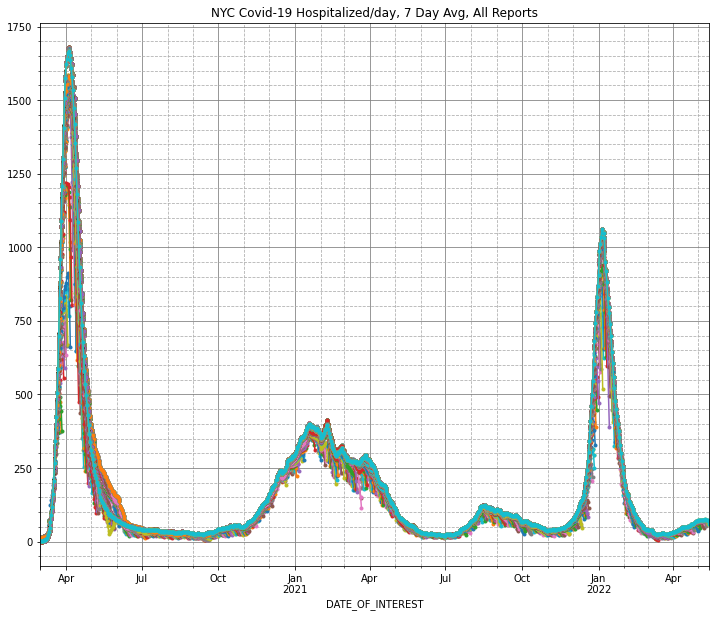

In [32]:
fig, ax = pltdflt()
dp.plot(style=".-", ax=ax, legend=None)
#ax.legend(loc="upper left")
plt.title("NYC Covid-19 Hospitalized/day, 7 Day Avg, All Reports")
plt.savefig("hospitalizedPerDayHistory.png", bbox_inches="tight")

In [33]:
start = "2020-09-01"
hdatpart = hdat[hdat["AS_OF"] >= start]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Hospitalized/day, 7 day avg")
dppart = dp[dp.index >= start]

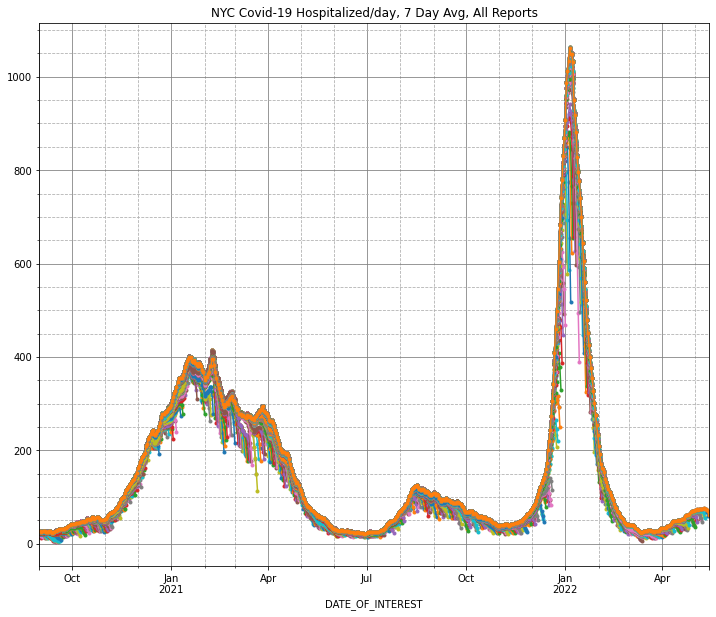

In [34]:
fig, ax = pltdflt()
dppart.plot(style=".-", ax=ax, legend=None)
#ax.legend(loc="upper left")
plt.title("NYC Covid-19 Hospitalized/day, 7 Day Avg, All Reports")
plt.savefig("hospitalizedPerDayRecentHistory.png", bbox_inches="tight")

# Growth rates
Various analyses of growth rates.  Done to see if we can model the missing data.  The idea is that if we can estimate the convergence rates of the data, we can use that to correct the latest reports to get a better picture.

In [35]:
hdat["Days"] = hdat.groupby("DATE_OF_INTEREST").cumcount()

In [36]:
df = hdat.groupby("DATE_OF_INTEREST").diff()
df["DATE_OF_INTEREST"] = hdat["DATE_OF_INTEREST"]
df["AS_OF"] = hdat["AS_OF"]
df["Days"] = hdat["Days"]

In [37]:
d2 = df.pivot_table(index="Days",
                   columns="DATE_OF_INTEREST",
                   values="Deaths/day, 7 day avg")

Text(0.5, 1.0, 'Change in deaths/day, 7 day avg, from day to day, as a function of the age of the report')

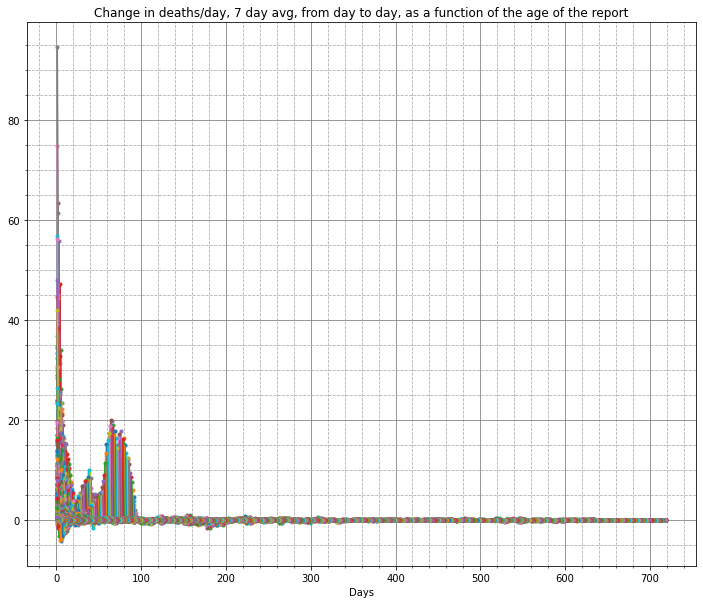

In [38]:
fig, ax = pltdflt()
d2.plot(style=".-", ax=ax, legend=None)
plt.title("Change in deaths/day, 7 day avg, from day to day, as a function of the age of the report")

In [39]:
d3 = df.pivot_table(index="Days",
                   columns="DATE_OF_INTEREST",
                   values="NEW_COVID_CASE_COUNT")

<AxesSubplot:xlabel='Days'>

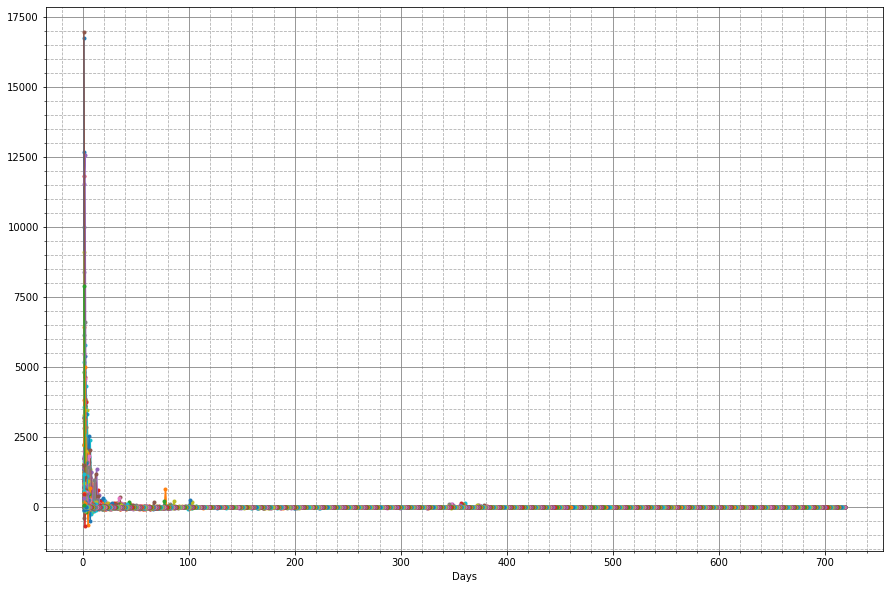

In [40]:
fig, ax = pltdflt(figsize=(15,10))
d3.plot(style=".-", ax=ax, legend=None)

## Individual graphs
To better analyze the above data, we separately graph the values reported for each historical date. We look at the actual values and the change in values.

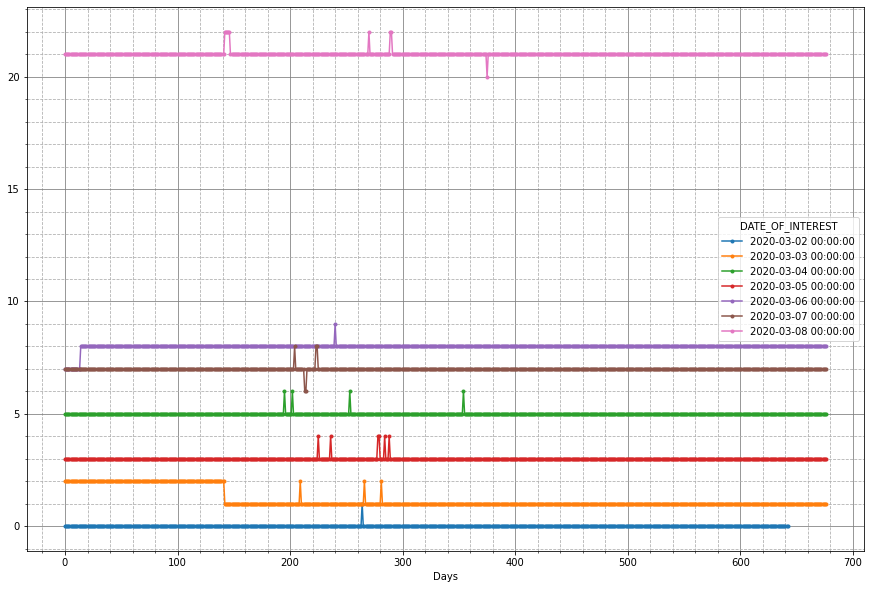

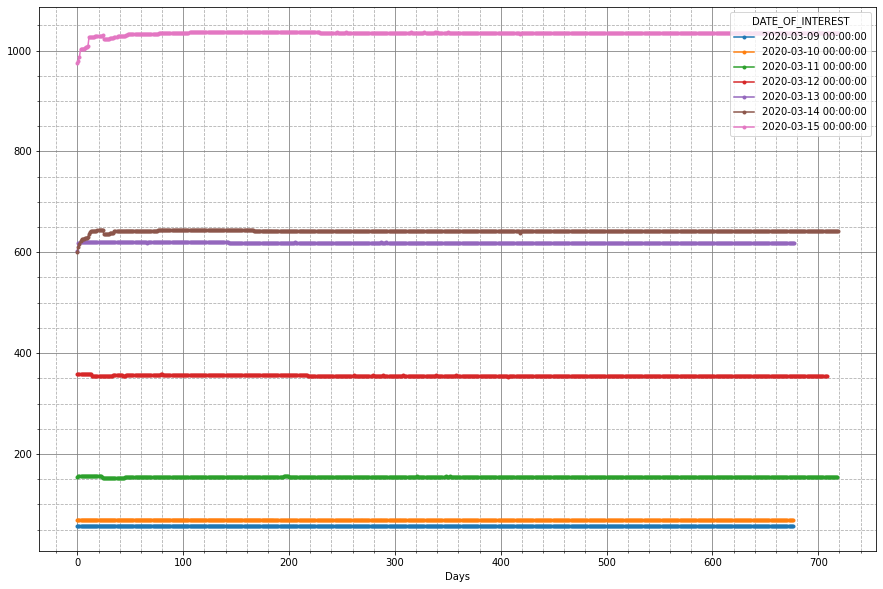

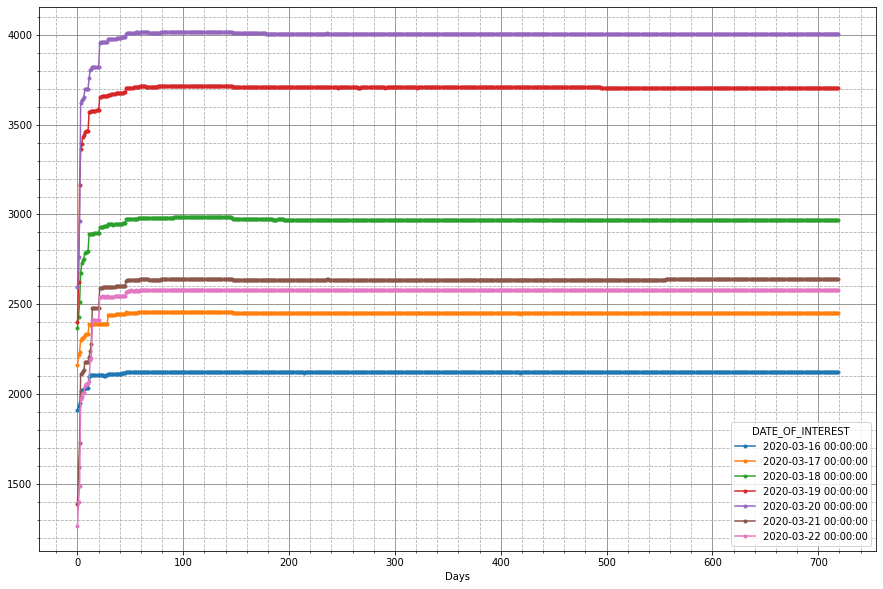

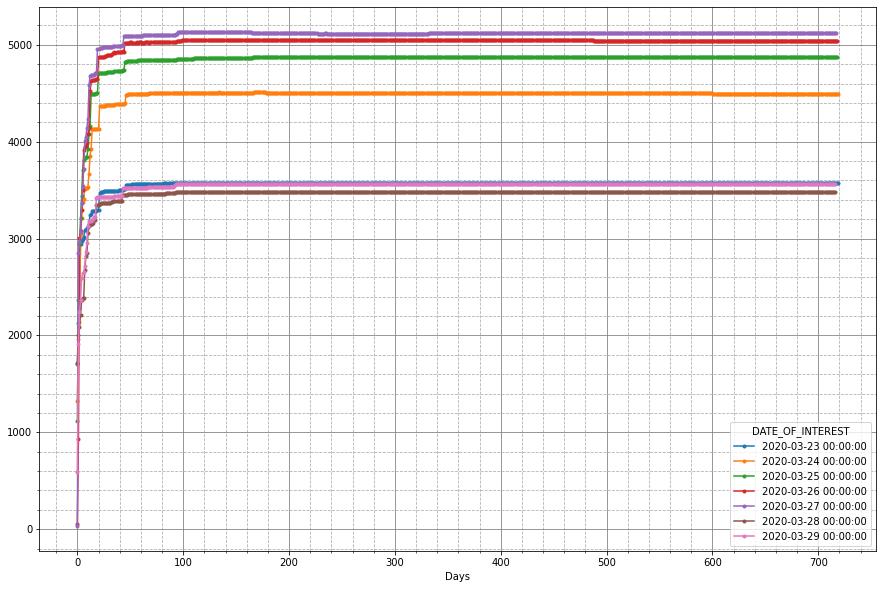

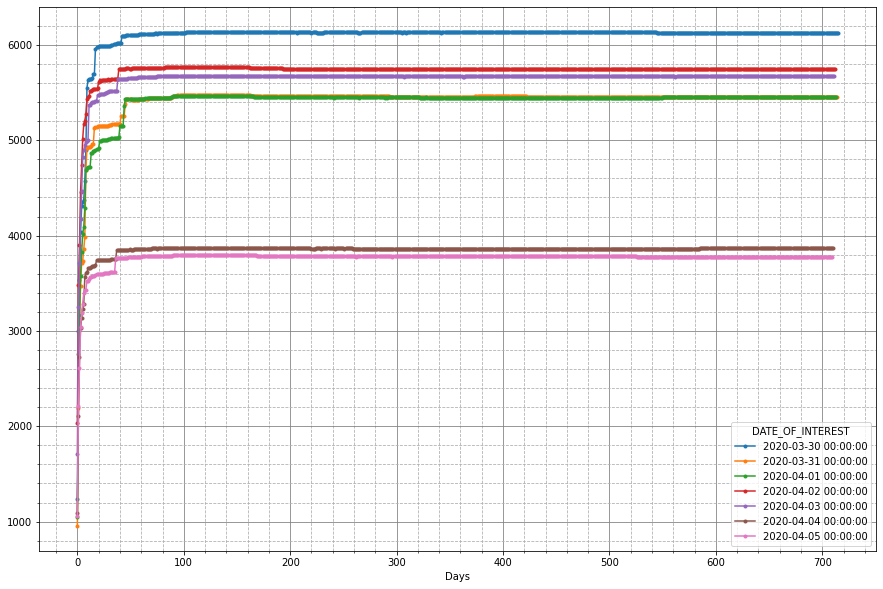

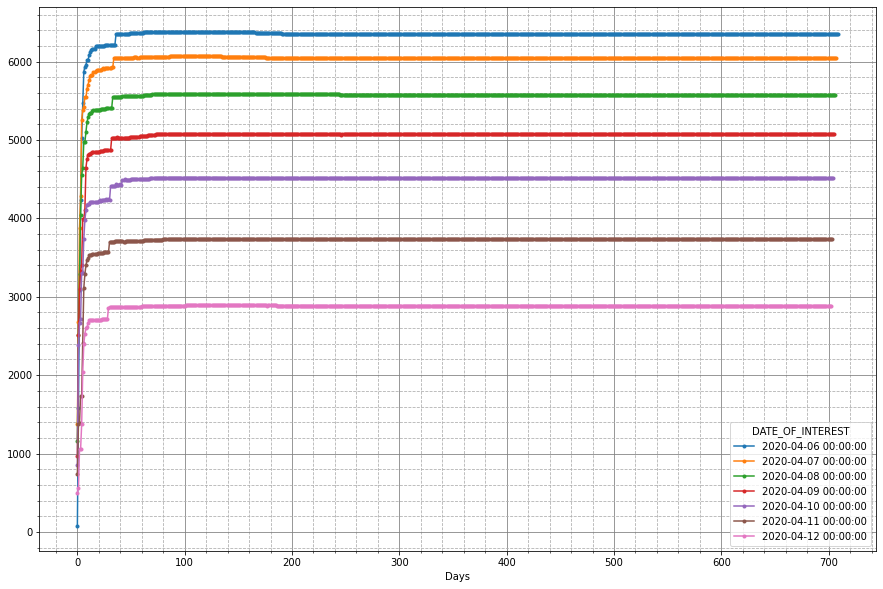

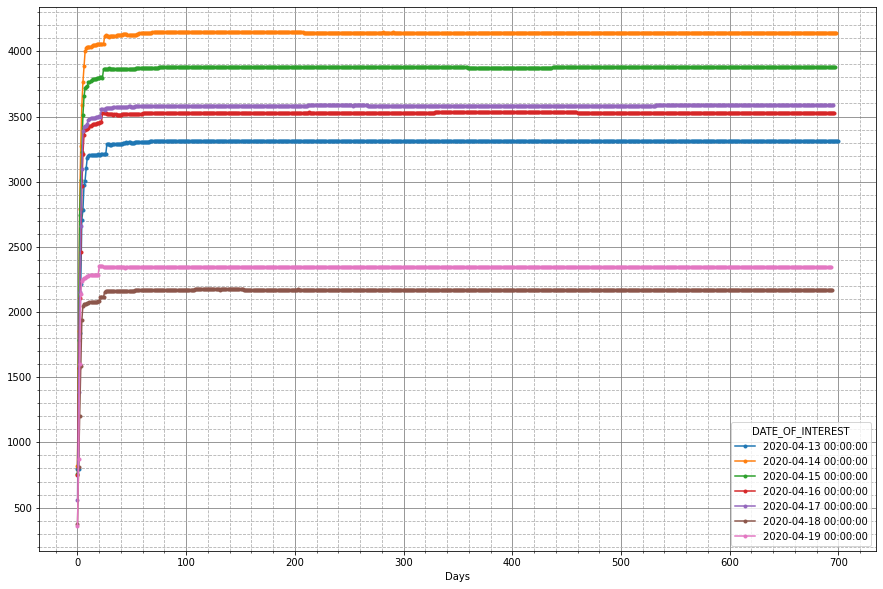

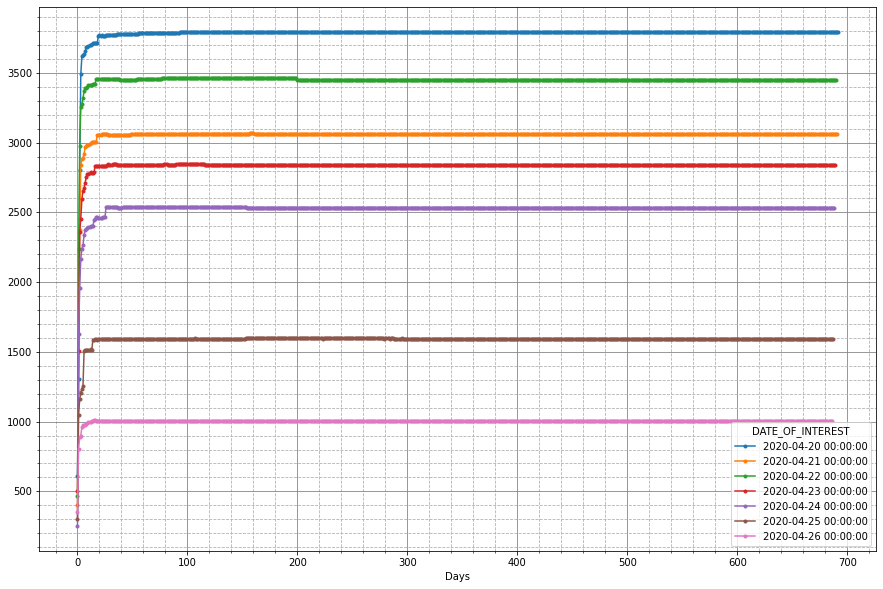

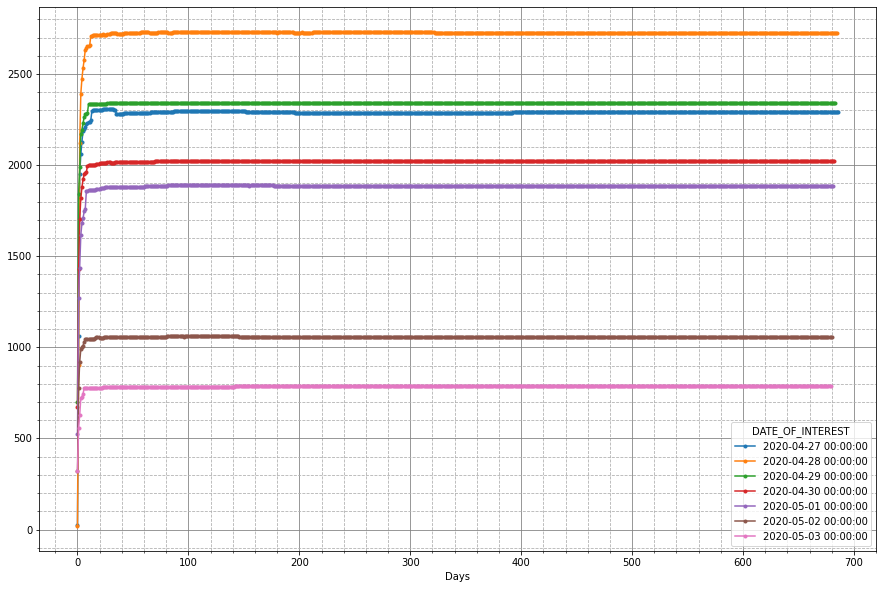

In [41]:
init = pd.to_datetime("2020-03-02")
delta = 7
for d in range(0, 60, delta):
    s = init +  pd.DateOffset(days=d)
    e = init +  pd.DateOffset(days=(d+delta))
    perday = hdat[(hdat["DATE_OF_INTEREST"] >= s) & (hdat["DATE_OF_INTEREST"] < e)] \
                 .pivot_table(index="Days",
                              columns="DATE_OF_INTEREST",
                              values="NEW_COVID_CASE_COUNT")
    if (len(perday) > 0):
        fig, ax = pltdflt(figsize=(15,10))
        perday.plot(style=".-", ax=ax)
        plt.show()

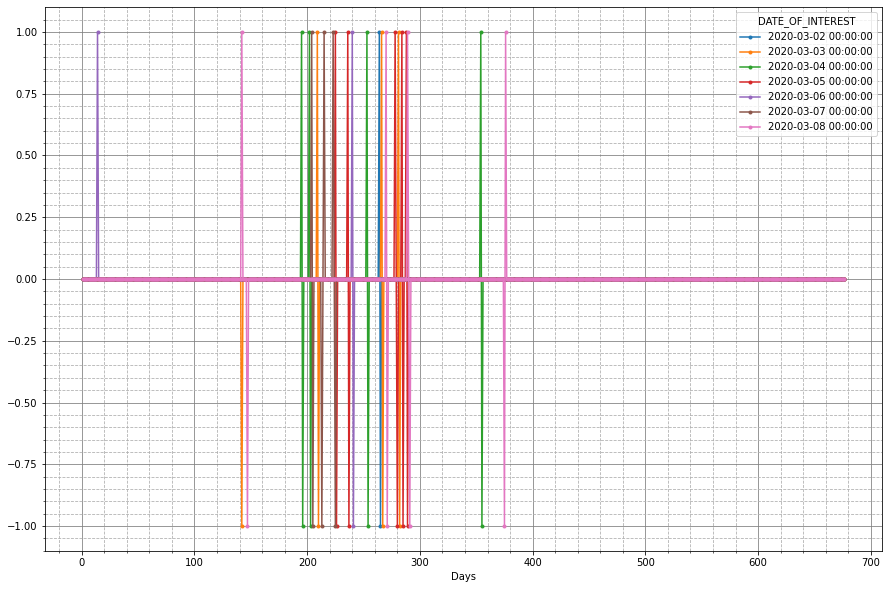

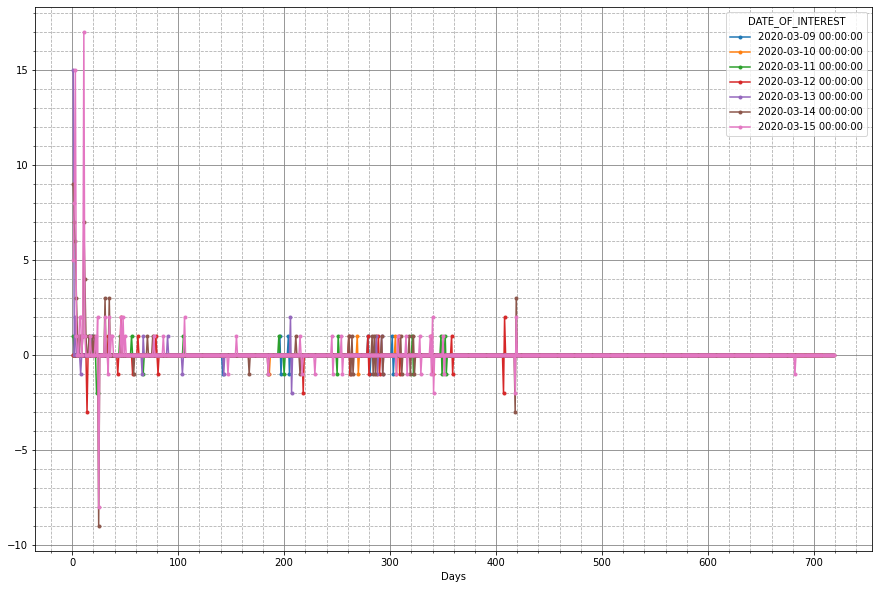

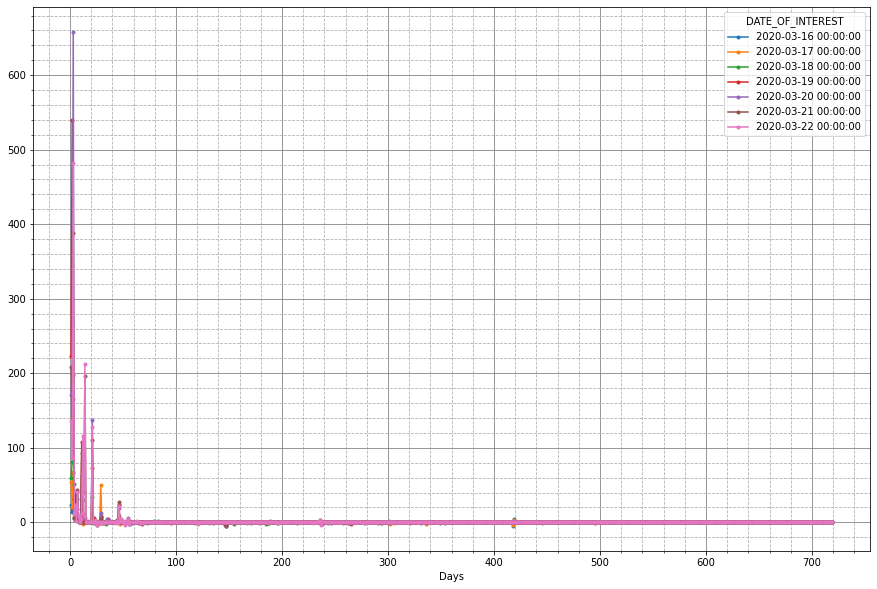

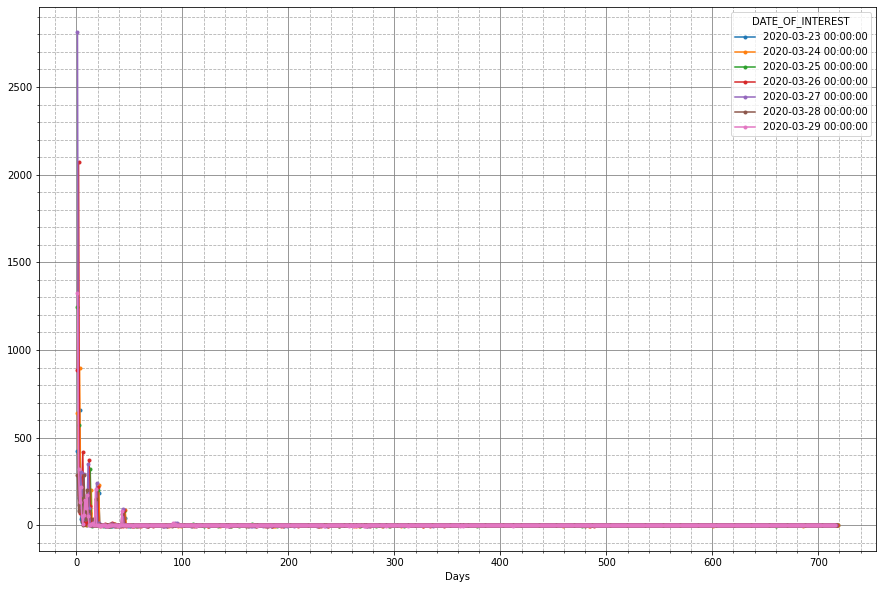

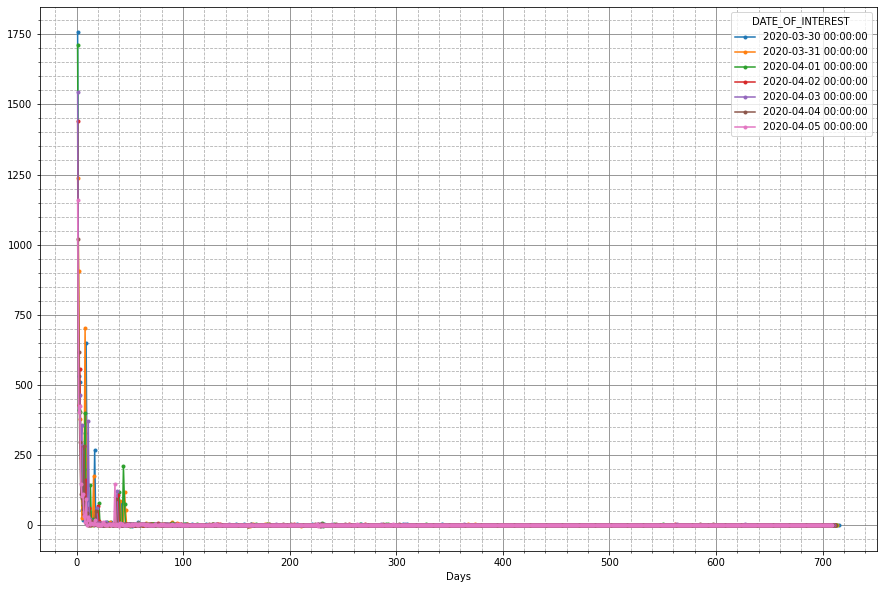

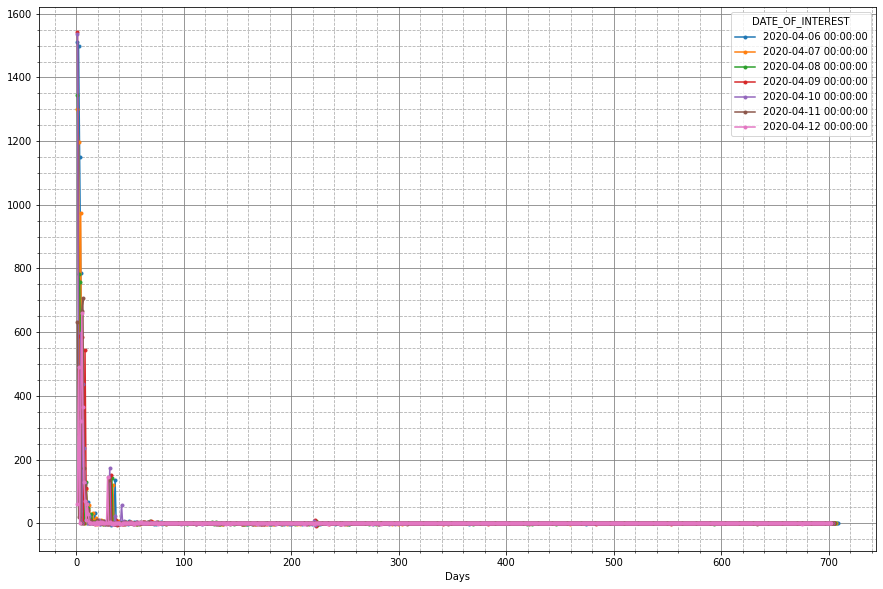

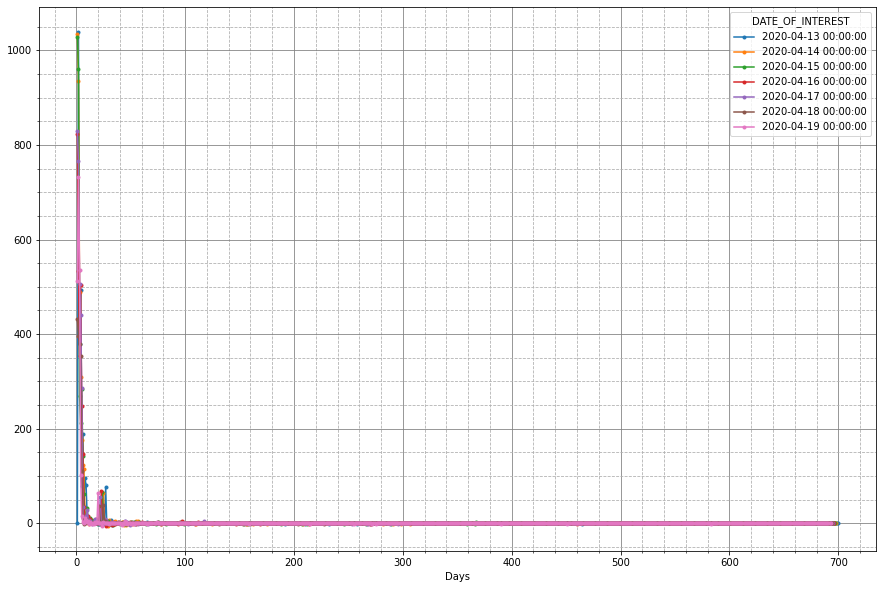

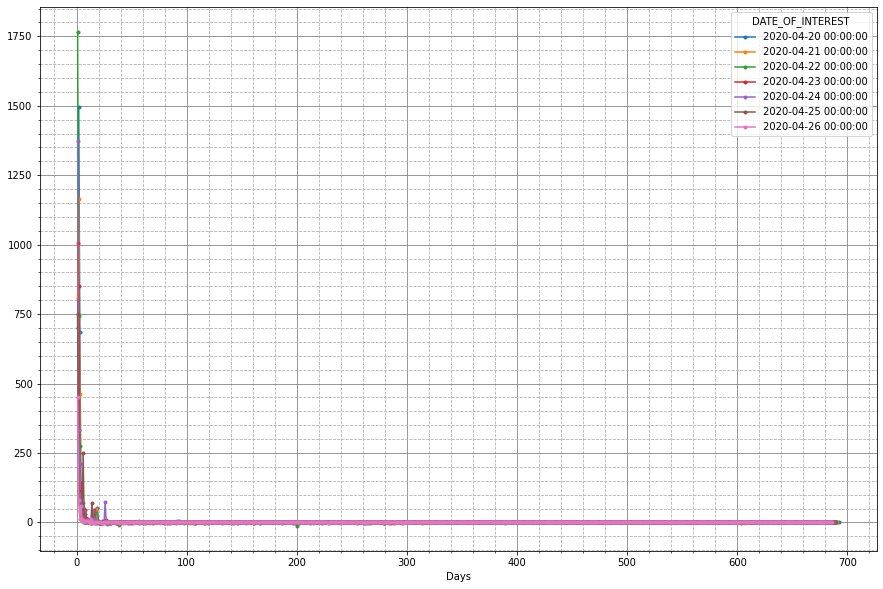

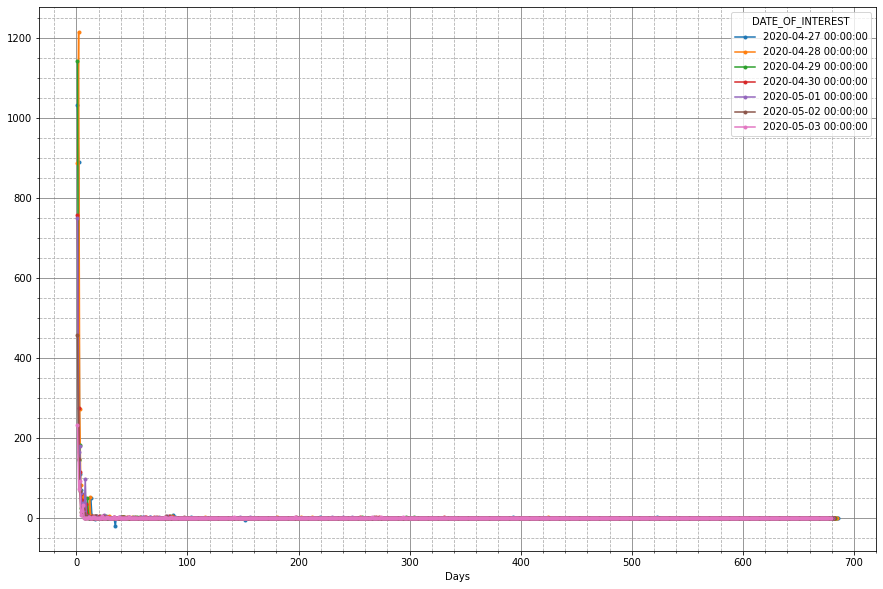

In [42]:
init = pd.to_datetime("2020-03-02")
delta = 7
for d in range(0, 60, delta):
    s = init +  pd.DateOffset(days=d)
    e = init +  pd.DateOffset(days=(d+delta))
    perday = hdat[(hdat["DATE_OF_INTEREST"] >= s) & (hdat["DATE_OF_INTEREST"] < e)] \
                 .pivot_table(index="Days",
                              columns="DATE_OF_INTEREST",
                              values="NEW_COVID_CASE_COUNT")
    perday = perday.diff()
    if (len(perday) > 0):
        fig, ax = pltdflt(figsize=(15,10))
        perday.plot(style=".-", ax=ax)
        plt.show()